# Assignment 4



In [1]:
library(randomForest)
library(xgboost)
library(ggplot2)

Warning message:
"package 'randomForest' was built under R version 4.2.2"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.

Warning message:
"package 'xgboost' was built under R version 4.2.2"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




In [2]:
X_test = read.table("X_test.txt", header = TRUE, sep = " ", dec = ".")
X_train = read.table("X_train.txt", header = TRUE, sep = " ", dec = ".")
y_test_high_snr = read.table("y_test_high_snr.txt", header = TRUE, sep = " ", dec = ".")
y_test_low_snr = read.table("y_test_low_snr.txt", header = TRUE, sep = " ", dec = ".")
y_train_high_snr = read.table("y_train_high_snr.txt", header = TRUE, sep = " ", dec = ".")
y_train_low_snr = read.table("y_train_low_snr.txt", header = TRUE, sep = " ", dec = ".")

In [3]:
mse <- function(y1, y2) {
    return (mean((y1 - y2)^2))
}

# Random Forest - High SNR

In [4]:
m = seq(20, 50, 1.25)
m

[1] 20.00 21.25 22.50 23.75 25.00 26.25 27.50 28.75 30.00 31.25 32.50 33.75
[13] 35.00 36.25 37.50 38.75 40.00 41.25 42.50 43.75 45.00 46.25 47.50 48.75
[25] 50.00

In [5]:
rf_errors_high <- data.frame()

for (i in 1:length(m)) {
    rf.fit = randomForest(
        y ~ ., 
        data=data.frame(X_train, y_train_high_snr), 
        mtry=m[i])
    preds = predict(rf.fit, newdata=X_test)
    rf_errors_high = rbind(rf_errors_high, data.frame(MSE=mse(preds, y_test_high_snr$y)))
    if (i %% 5 == 0) {
    cat(i, "-th loop done.\n")
    }
}

5 -th loop done.
10 -th loop done.
15 -th loop done.
20 -th loop done.
25 -th loop done.


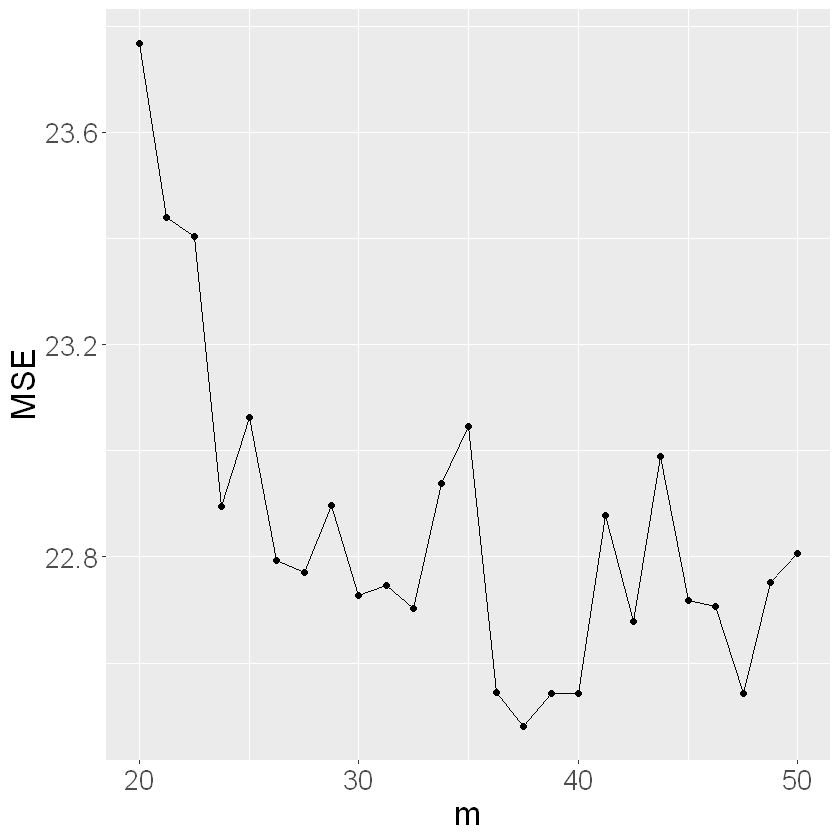

In [6]:
ggplot(rf_errors_high, aes(x=m, y=MSE)) +
    geom_point() +
    geom_line() +
    theme(
        text = element_text(size = 20)
    )

When SNR is High, greater mtry value tend to reduce the mean squared error. 

# Random Forest - Low SNR

In [7]:
m = seq(1, 49, (49-1)/32)
m

[1]  1.0  2.5  4.0  5.5  7.0  8.5 10.0 11.5 13.0 14.5 16.0 17.5 19.0 20.5 22.0
[16] 23.5 25.0 26.5 28.0 29.5 31.0 32.5 34.0 35.5 37.0 38.5 40.0 41.5 43.0 44.5
[31] 46.0 47.5 49.0

In [8]:
rf_errors_low <- data.frame()

for (i in 1:length(m)) {
    rf.fit = randomForest(
      y ~ ., 
      data=data.frame(X_train, y_train_low_snr), 
      mtry=m[i]
    )
  
    preds = predict(rf.fit, newdata=X_test)
    rf_errors_low = rbind(rf_errors_low, data.frame(MSE=mse(preds, y_test_low_snr$y)))
    if (i %% 5 == 0) {
    cat(i, "-th loop done.\n")
    }
}

5 -th loop done.
10 -th loop done.
15 -th loop done.
20 -th loop done.
25 -th loop done.
30 -th loop done.


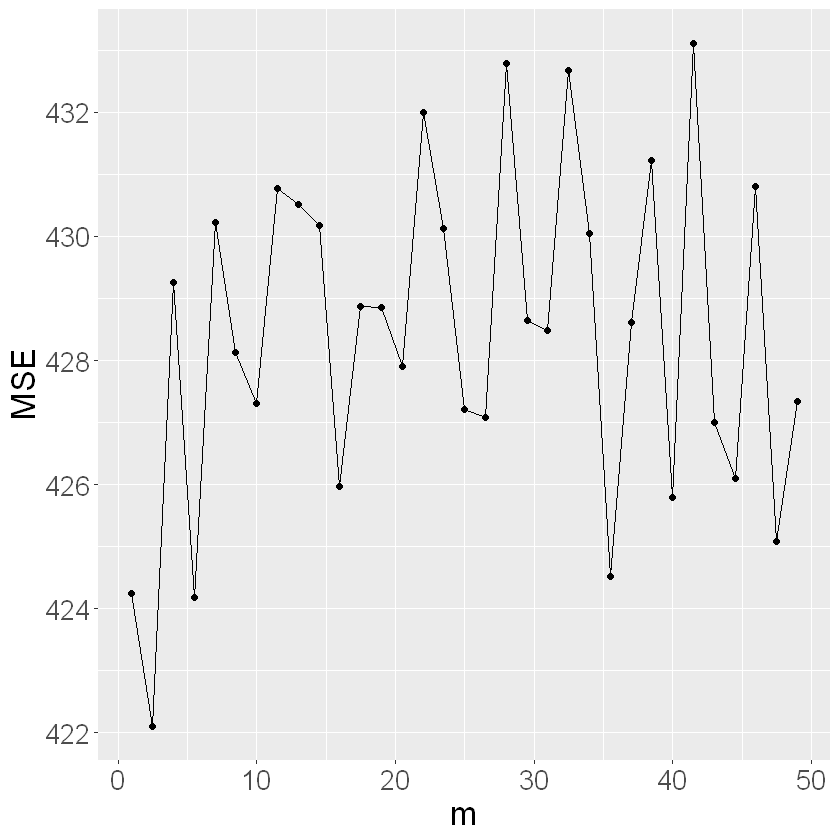

In [9]:
ggplot(rf_errors_low, aes(x=m, y=MSE)) +
    geom_point() +
    geom_line() +
    theme(text = element_text(size = 20))

If the SNR is low, greater mtry values tend to increases the mean squared error. 
This is expected as noisy variables are more likely to be selected when SNR is low.

# Gradient Boosting - High SNR

In [10]:
lr = seq(0.05, 0.9, 0.05)^2
lr

[1] 0.0025 0.0100 0.0225 0.0400 0.0625 0.0900 0.1225 0.1600 0.2025 0.2500
[11] 0.3025 0.3600 0.4225 0.4900 0.5625 0.6400 0.7225 0.8100

In [11]:
xg_errors_high <- data.frame()

In [12]:
for (i in 1:length(lr)) {
    xg.fit = xgboost(
        data = data.matrix(X_train), 
        label = y_train_high_snr$y,
        nrounds = dim(X_train)[1], 
        eta = lr[i], 
        verbose = FALSE
    )
    
    pred = predict(xg.fit, newdata=data.matrix(X_test))
    xg_errors_high = rbind(xg_errors_high, data.frame(MSE=mse(pred, y_test_high_snr$y)))
    if (i %% 5 == 0) {
        cat(i, "-th loop done.\n")
    }
}

5 -th loop done.
10 -th loop done.
15 -th loop done.


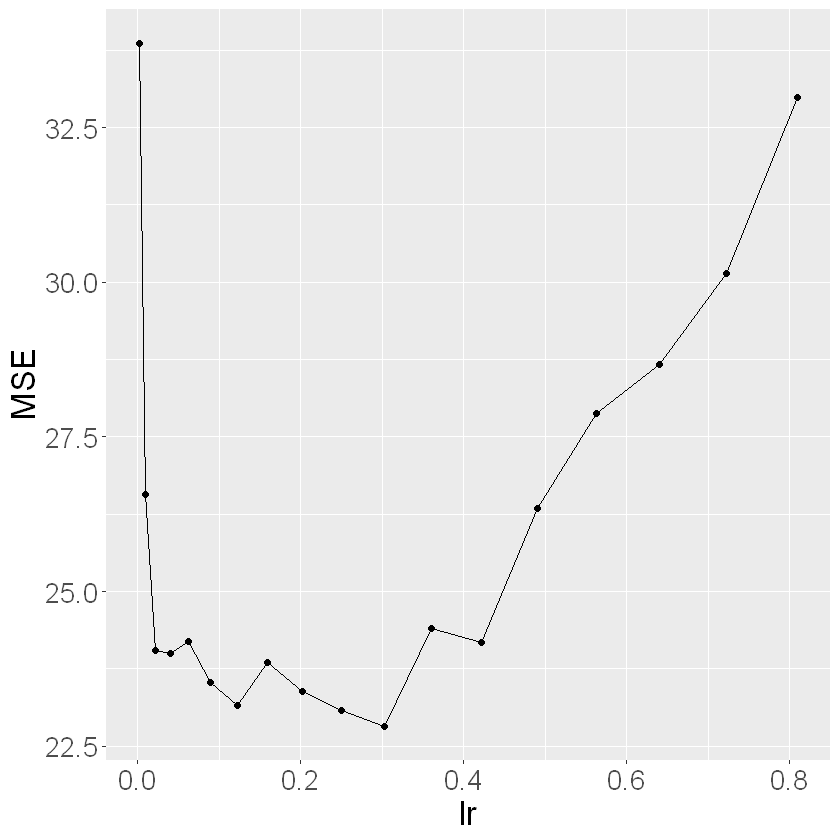

In [13]:
ggplot(xg_errors_high, aes(x=lr, y=MSE)) +
    geom_point() +
    geom_line() +
    theme(text = element_text(size = 20))

If data has high SNR in Boosting, the MSE and learning rate plot follows U shape.
Small learning rates seem to be generally better except when the learning rate is extremely small such that only tiny updates will be made.

# Gradient Boosting - Low SNR

In [14]:
xg_errors_low <- data.frame()
for (i in 1:length(lr)) {
    xg.fit = xgboost(
        data = data.matrix(X_train), 
        label = y_train_low_snr$y,
        nrounds = dim(X_train)[1], 
        eta = lr[i], 
        verbose = FALSE
    )
    
    pred = predict(xg.fit, newdata=data.matrix(X_test))
    xg_errors_low = rbind(xg_errors_low, data.frame(MSE=mse(pred, y_test_low_snr$y)))
    if (i %% 5 == 0) {
        cat(i, "-th loop done.\n")
    }
}

5 -th loop done.
10 -th loop done.
15 -th loop done.


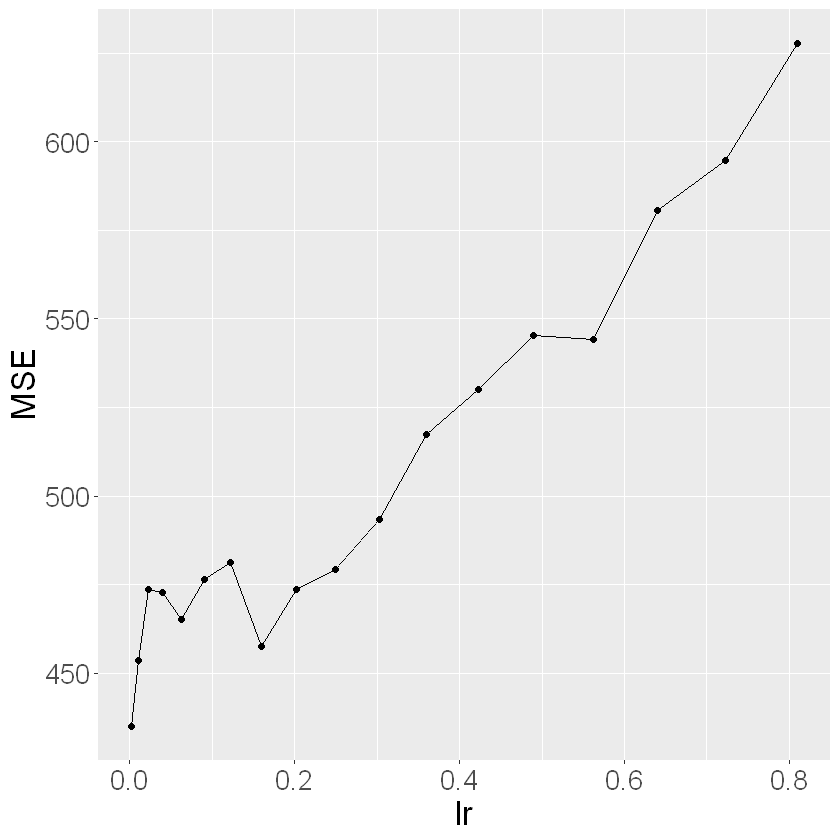

In [15]:
ggplot(xg_errors_low, aes(x=lr, y=MSE)) +
    geom_point() +
    geom_line() +
    theme(
        text = element_text(size = 20)
    )

The situation is a bit different if the SNR is low.
Learning rate is almost linearly proportional to the MSE. In other words, the most less boosted model performed better than the more boosted ones.

Therfore, boosting might not be an appropriate choice when SNR is low.